In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
N = 10000               # Number of users
video_types = 4         # Number of video types
alpha = 0.05        # Confidence level
log_term = np.log(1 / alpha)
# Number of iterations for simulation
num_iterations = 1000

In [3]:
# Initialize arrays for counting clicks and recommendations
m_k = np.zeros(video_types)  # Clicks for each video type
n_k = np.zeros(video_types)  # Recommendations for each video type
R_k = np.zeros(video_types)  # Revenue for each video type

In [4]:
# Store results for each iteration
m_s_avg = np.zeros((N, video_types))  # Average clicks
n_s_avg = np.zeros((N, video_types))  # Average recommendations
R_s_avg = np.zeros((N, video_types))  # Average revenue

In [5]:
# True probabilities and revenue factors
p_true = [0.2, 0.4, 0.6, 0.65]
a_k = [8, 2, 2, 2]

In [20]:

# Function to calculate Upper Confidence Bound (UCB)
def calc_ucb(n_k, m_k):
    ucb_k = np.zeros(video_types)
    for k in range(video_types):
        if (n_k[k] > 0) & (m_k[k] >0 ) :
            ucb_k[k] =(R_k[k]/m_k[k])*( (m_k[k] / n_k[k]) + np.sqrt(log_term / (2 * n_k[k])))
        else:
            ucb_k[k] = float('inf')  # Encourage exploration for untried actions
    return ucb_k

In [21]:
# Run the simulation
for _ in range(num_iterations):
    # Reset counts for each iteration
    n_k = np.zeros(video_types)
    m_k = np.zeros(video_types)
    R_k = np.zeros(video_types)

    for s in range(N):
        UCB_k = calc_ucb(n_k, m_k)
        chosen_type = np.argmax(UCB_k)  # Select the type with highest UCB
        clicked = np.random.rand() < p_true[chosen_type]  # Simulate click
        n_k[chosen_type] += 1  # Increment recommendation count
        m_k[chosen_type] += clicked  # Increment clicks
        R_k[chosen_type] += a_k[chosen_type] * np.random.rand() * clicked  # Increment revenue

        # Store results for average calculations
        n_s_avg[s] += n_k
        m_s_avg[s] += m_k
        R_s_avg[s] += R_k
    

In [22]:
# Calculate the average results
m_s_avg /= num_iterations  # Average clicks
n_s_avg /= num_iterations  # Average recommendations
R_s_avg /= num_iterations  # Average revenue

# for k in range(video_types):
#     for s in range(N):
#         if n_s_avg[s][k] == 0 : n_s_avg[s][k] = 1

In [23]:
m_by_n_avg = np.zeros((N, video_types))
for k in range(video_types):
    m_by_n_avg[:, k] = m_s_avg[:, k] / n_s_avg[:, k]  # Avoid division by zero

C:\Users\DELL\AppData\Local\Temp\ipykernel_28800\2283375767.py:3: RuntimeWarning: invalid value encountered in divide
  m_by_n_avg[:, k] = m_s_avg[:, k] / n_s_avg[:, k]  # Avoid division by zero


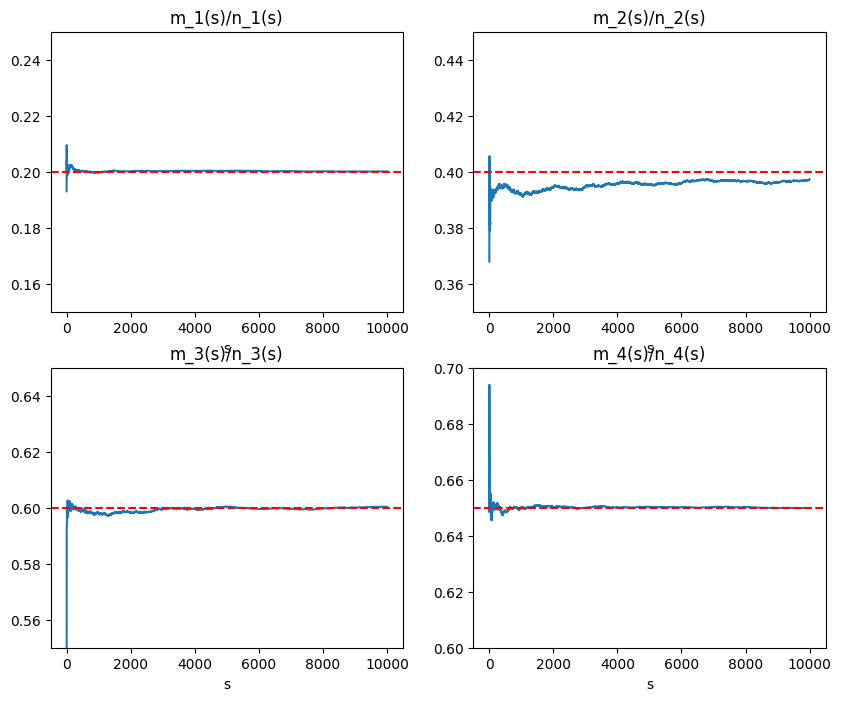

In [24]:
fig, axs = plt.subplots(2,2,figsize = (10,8))
for k in range(video_types):
    axs[int(k/2),k-2*int(k/2)].plot(m_by_n_avg[:,k])
    axs[int(k/2),k-2*int(k/2)].set_title(f'm_{k+1}(s)/n_{k+1}(s)')
    axs[int(k/2),k-2*int(k/2)].set_xlabel('s')
    
    axs[int(k/2),k-2*int(k/2)].set_ylim(p_true[k]-0.05, p_true[k]+0.05)
    axs[int(k/2),k-2*int(k/2)].axhline(y=p_true[k] , color = 'r' , linestyle = '--')
    # plt.show()
    # plt.clf()
plt.show()

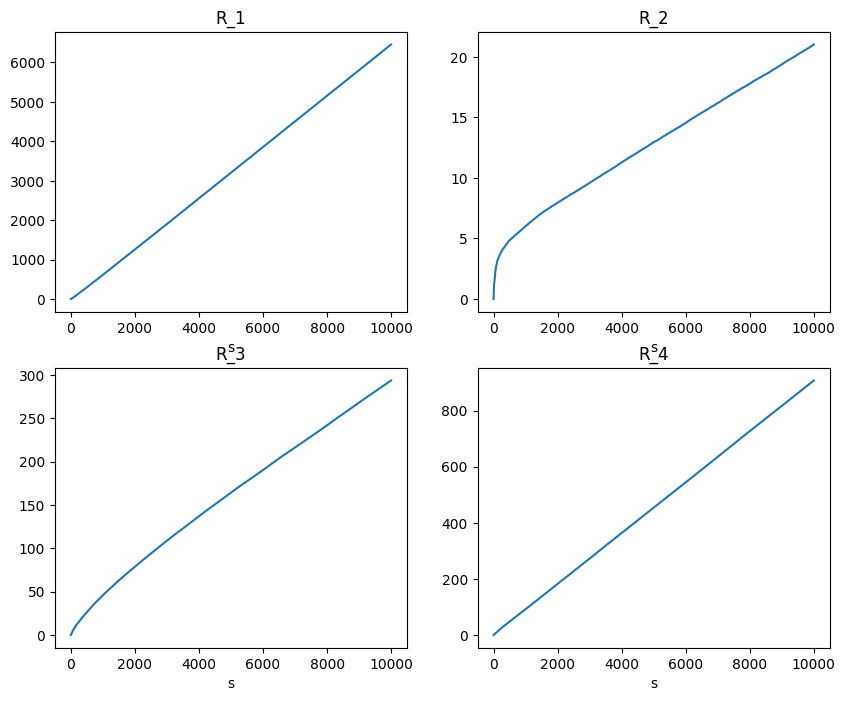

In [25]:
fig2, axs2 = plt.subplots(2,2, figsize=(10,8))
for k in range(video_types):
    axs2[int(k/2),k-2*int(k/2)].plot(R_s_avg[:,k])
    axs2[int(k/2),k-2*int(k/2)].set_title(f'R_{k+1}')
    axs2[int(k/2),k-2*int(k/2)].set_xlabel('s')
    
    # axs[int(k/2),k-2*int(k/2)].set_ylim(p_true[k]-0.05, p_true[k]+0.05)
    # axs[int(k/2),k-2*int(k/2)].axhline(y=p_true[k] , color = 'r' , linestyle = '--')
    # plt.plot(R_s_avg[:, k], label=f'Video Type {k+1}')
    # plt.title(f'R_{k+1}')
    # plt.xlabel('s')
    

plt.show()
    
    

In [26]:

total_revenue_N_people = R_s_avg[10000-1][0]+R_s_avg[N-1][1]+R_s_avg[N-1][2]+R_s_avg[N-1][3]
total_revenue_N_people

np.float64(7678.334538217949)